In [3]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [4]:
#inputs
r = np.array([0,2,0])
v = np.array([-1, 1, 0]) / np.sqrt(2)

In [5]:
#calculate ang momentum
h = np.cross(r,v)
h

array([ 0.        , -0.        ,  1.41421356])

In [6]:
#calculate eccentricity
e = ( np.cross(v,h) / 1 ) - r / la.norm(r)
e

array([ 1.00000000e+00, -2.22044605e-16,  0.00000000e+00])

In [7]:
#calculate dot product of h and e, should be 0
np.dot(h,e)

0.0

In [8]:
h.dot(h)

1.9999999999999996

In [9]:
#magnitude of eccentricity
la.norm(e)

0.9999999999999998

In [10]:
#calculate magnitudes of vectors for scalar equations
r_mag = la.norm(r)
v_mag = la.norm(v)
e_mag = la.norm(e)
#a = mu / ( (h**2 / r) - v^2/mu), this is a parabola so it is essentially infinity
a = 1.0 / ( ( 2/r_mag ) - ( v_mag**2 ) )
a

4503599627370496.0

In [11]:
##calculate E0 using tan eqn and then use f-E relations to find f0
E_0 = np.arctan2(  np.dot(r,v) , np.sqrt(a) * (1 - (r_mag / a) ) )
f_0 = 2 * np.arctan( np.sqrt( (1 + e_mag) / (1 - e_mag) ) * np.tan(E_0 / 2) )
np.degrees(f_0)

90.00000000000001

In [12]:
##solve for f using r(f) eqn. two possible angles
f_32 = np.arccos( h.dot(h) / (e_mag * 32) - 1 /e_mag )
np.degrees(f_32)

159.63586519368224

In [13]:
#velocity from vis viva
v_32 = np.sqrt( 2/32 - 1/a)

In [14]:
v_32

0.24999999999999956

In [15]:
#problem 2 inputs
rfdot = 7.0 #km/s
rdot = 3.5 #km/s
r = 6378 + 600 #km
## v**2 = rfdot**2 + rdot**2, cylindrical coord relation
v_sqr = rfdot**2 + rdot**2 
mu = 398600.4418 # km^3 / s^2

In [16]:
#calculate a = 1 / ( (2 / r) - v^2/mu
a = 1 / ( (2/r) - (v_sqr / mu) )
a

7521.487400250498

In [17]:
##specific angular momentum equals radius times perpendicular velocity
h = r * rfdot
h

48846.0

In [18]:
##from h^2 = mu * a * (1 - e^2)
e = np.sqrt(1 - (h**2 / (mu * a) ) )
e

0.4518594595875744

In [19]:
##calculate f_0 from polar equation again
f_0 = np.arccos( h**2 / (e * r * mu) - (1 / e) )
np.degrees(f_0)

108.34182945564665

In [20]:
##verify with E_0 method, not sure if this means anything but I decided to use 108 degs even thought there are technically 2 possible angles
E_0 = np.arctan2( r * rdot, np.sqrt(a * mu) * (1 - r / a) )
f_0 = 2 * np.arctan( np.sqrt( (1 + e) / (1 - e) ) * np.tan(E_0 / 2) )
np.degrees(f_0)

108.34182945564666

In [21]:
##inputs and scalars for inputs
r_0 = np.array([-8903.833, 1208.356, 213.066]) #km
v_0 = np.array([-0.971, -6.065, -1.069]) #km / s
mu = 398600.0 # km^3 / s^2
R = 6378.0
t_end = 3 * 60 * 60 #3 hours in 
r_0mag = la.norm(r_0)
v_0mag = la.norm(v_0)

In [22]:
##test case
r_0 = np.array([-4743, 4743, 0]) #km
v_0 = np.array([-5.879, -4.223, 0]) #km / s
mu = 398600.0 # km^3 / s^2
R = 6378.0
r_0mag = la.norm(r_0)
v_0mag = la.norm(v_0)

In [23]:
##a = 1 / ( (2 / r) - v^2/mu
a = 1.0 / ( ( 2/r_0mag ) - ( v_0mag**2 / mu) )
a

5998.167901428763

In [24]:
##h = r x v
h = np.cross(r_0,v_0)
h_mag = la.norm(h)
np.set_printoptions(suppress=True)
print(h, h_mag)

[    0.        0.    47913.786] 47913.78599999999


In [25]:
# e = v x h / mu - r / r_mag
e = ( np.cross(v_0,h) / mu ) - r_0 / r_0mag
e_mag = la.norm(e)
print(e_mag)

0.19948073600396923


In [26]:
#E_0 from arctan vector eqn
E_0 = np.arctan2(  np.dot(r_0,v_0) , np.sqrt(a * mu) * (1 - (r_0mag / a) ) )

In [27]:
E_0

2.2054837753322545

In [28]:
# n^2 = mu / a^3
n = np.sqrt(mu / a**3)
##calculate the time from periapsis using mean anomaly, to find mean anomaly at initial point.
t0 = (E_0 - e_mag * np.sin(E_0))/n
M0 = t0 * n
print(n, M0)

0.0013590665375406061 2.044850505199387


In [29]:
##mean anomaly at 3 hours, matches closely to true anomaly
n * t_end + M0

16.722769110637934

In [30]:
##made a function to run Newton's method to find change in E since initial
def getE(delta_t):
    M_rel = n * delta_t
    E_curr = M_rel
    err = 1
    tol = 1e-10
    while (abs(err) > tol):
        err = M_rel + E_0 - e_mag * np.sin(E_0) - E_curr + e_mag * np.sin(E_curr)
        derrdE = -1 + e_mag * np.cos(E_curr)
        E_next = E_curr - err / derrdE
        E_curr = E_next
    return E_curr

In [31]:
##E_f using function, is close to mean anomaly
E_f = getE(t_end)
print(E_f)

16.57117667843485


In [32]:
##made functions for F and G
def F(delta_t, E):
    return 1 - (a/r_0mag) * (1 - np.cos(E - E_0))
def G(delta_t, E):
    return delta_t - np.sqrt(a**3 / mu) * ( (E - E_0) - np.sin(E - E_0) )

In [33]:
##find r at 3 hrs using F and G
r_f = F(t_end, E_f) * r_0 + G(t_end, E_f) * v_0
r_fmag = la.norm(r_f)
print(F(t_end, E_f), G(t_end, E_f))
print(r_f , r_fmag)

-0.09681388470337726 946.4047943572823
[-5104.72553088 -4455.85570172     0.        ] 6775.903834924327


In [34]:
##made functions for Fdot and Gdot
def Fdot(E, r):
    return -np.sqrt(mu * a) * np.sin(E - E_0) / (r * r_0mag)
def Gdot(E, r):
    return 1 - (a/r) * (1 - np.cos(E - E_0))

In [35]:
##velocity from functions.
v_f = Fdot(E_f, r_fmag) * r_0 + Gdot(E_f, r_fmag) * v_0
print('%.10f' % Fdot(E_f, r_fmag), Gdot(E_f, r_fmag), v_f)
##it appears at 3 hrs, the object is close to periapsis while at initial time it was close to apoapsis. This is reflected as the radius 
##and velocity are roughly opposite of initial values

-0.0010478574 -0.08575997589119555 [ 5.47417043 -4.60782315 -0.        ]


In [36]:
times = np.zeros((101,1)) #initialize array to hold times
R = np.zeros((101,3)) #holder for radius vectors
V = np.zeros((101,3)) #holder for velocity vectors
for i in range(101):
    times[i][0] = t_end / 100 * i

In [37]:
##find and store radius and velocity at every time using the method we used to find final values for all of these
for i in range(101):
    delta_t = times[i][0]
    E = getE(delta_t)
    r = F(delta_t, E) * r_0 + G(delta_t, E) * v_0
    r_mag = la.norm(r)
    v = Fdot(E, r_mag) * r_0 + Gdot(E, r_mag) * v_0
    R[i][0], R[i][1], R[i][2] = r[0], r[1], r[2]
    V[i][0], V[i][1], V[i][2] = v[0], v[1], v[2]

In [38]:
#transpose to make plotting easier
R = R.T

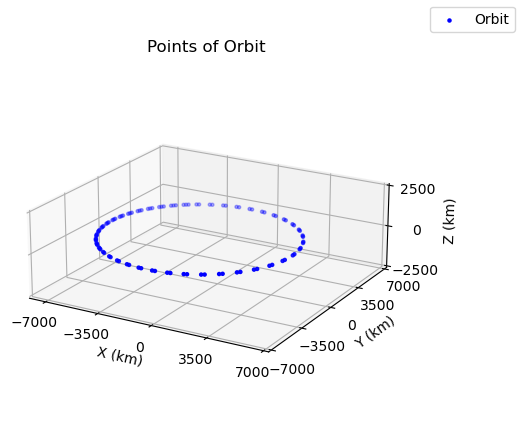

In [39]:
##make a plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.plot(R[:][0], R[:][1], R[:][2], label='parametric curve')
ax.scatter(R[0], R[1], R[2], label='Orbit', marker = '.', c = 'blue')
ax.set_zticks([-2500, 0, 2500])
ax.set_xticks([-7000, -3500, 0, 3500, 7000])
ax.set_yticks([-7000, -3500, 0, 3500, 7000])
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
ax.set_zlabel("Z (km)")
ax.set_aspect('equal')
ax.view_init(elev=20)
plt.title("Points of Orbit")
fig.legend()
plt.show()

In [5]:
np.degrees(np.arctan2(2.906,4.467))

33.045953279746755